In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
# Needed for decision tree visualization
#import pydotplus
#from IPython.display import Image

In [2]:
df = pd.read_csv(Path('../Clean_datasets/Agg_Final_clean_table.csv'))
df

,County_of_Residence,Age,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,...,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,Description,urban,rural,suburban
0,Alameda,Less than 1 year,1,0,0,0,411,0,0,85,...,0,194,216,410,6,0,urban,1,0,0
1,Alameda,1 - 4 years,2,0,0,0,61,0,0,36,...,0,36,36,41,0,0,urban,1,0,0
2,Alameda,5 - 9 years,3,0,0,0,60,0,0,30,...,0,36,36,36,6,0,urban,1,0,0
3,Alameda,10 - 14 years,4,0,0,0,66,0,0,24,...,0,36,36,50,0,0,urban,1,0,0
4,Alameda,15 - 19 years,5,0,0,73,138,60,0,36,...,0,58,169,233,6,12,urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yuba,80 - 84 years,18,60,50,204,98,100,20,36,...,191,211,235,289,0,157,rural,0,1,0
1272,Yuba,85 - 89 years,19,60,50,155,103,73,20,36,...,209,192,179,249,0,122,rural,0,1,0
1273,Yuba,90 - 94 years,20,60,50,109,89,67,20,36,...,192,173,109,201,0,79,rural,0,1,0
1274,Yuba,95 - 99 years,21,50,10,63,60,50,0,30,...,81,66,36,73,0,36,rural,0,1,0


In [3]:
ref_df = df[['Age','age_cat']].copy()
ref_df

,Age,age_cat
0,Less than 1 year,1
1,1 - 4 years,2
2,5 - 9 years,3
3,10 - 14 years,4
4,15 - 19 years,5
...,...,...
1271,80 - 84 years,18
1272,85 - 89 years,19
1273,90 - 94 years,20
1274,95 - 99 years,21


In [4]:
df.columns

Index(['County_of_Residence', 'Age', 'age_cat', 'bachelors_degree',
       'graduate_degree', 'high_school_or_GED', 'less_than_high_school',
       'some_college_credit', 'edu_unknown', 'asian', 'black_african_american',
       'hispanic', 'multi_race', 'native_american', 'other_unknown',
       'pi_native_hawaiian', 'white', 'foreign_born', 'united_states',
       'immigration_unknown', 'divorced', 'married', 'never_married',
       'marital_unknown', 'widowed', 'female', 'male', 'veteran_no',
       'veteran_unknown', 'veteran_yes', 'Description', 'urban', 'rural',
       'suburban'],
      dtype='object')

In [5]:
#dropping the non numerical columns after creating coded columns and the highly correlated columns
df.drop(columns=['Description','County_of_Residence','Age','edu_unknown','other_unknown','immigration_unknown','marital_unknown','veteran_unknown'], inplace= True)
df

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,asian,black_african_american,hispanic,multi_race,...,married,never_married,widowed,female,male,veteran_no,veteran_yes,urban,rural,suburban
0,1,0,0,0,411,0,85,88,117,36,...,0,411,0,194,216,410,0,1,0,0
1,2,0,0,0,61,0,36,24,36,12,...,0,41,0,36,36,41,0,1,0,0
2,3,0,0,0,60,0,30,24,36,12,...,0,36,0,36,36,36,0,1,0,0
3,4,0,0,0,66,0,24,24,36,6,...,0,50,0,36,36,50,0,1,0,0
4,5,0,0,73,138,60,36,61,68,36,...,6,236,0,58,169,233,12,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,18,60,50,204,98,100,36,36,36,12,...,173,30,191,211,235,289,157,0,1,0
1272,19,60,50,155,103,73,36,30,36,18,...,117,30,209,192,179,249,122,0,1,0
1273,20,60,50,109,89,67,36,30,36,12,...,58,24,192,173,109,201,79,0,1,0
1274,21,50,10,63,60,50,30,18,24,0,...,30,0,81,66,36,73,36,0,1,0


<AxesSubplot:>

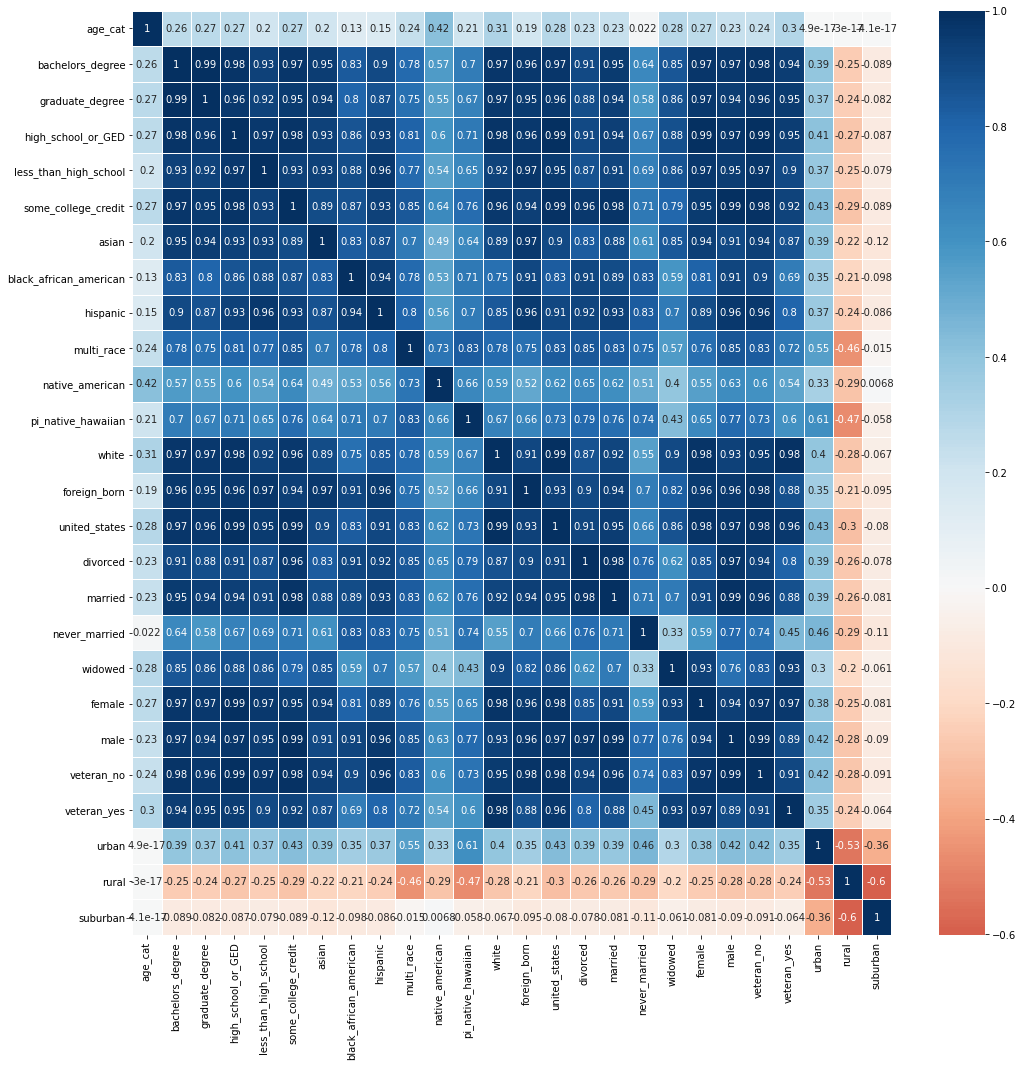

In [6]:
#creating heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(17,17))         
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1, center = 0)

In [7]:
#splitting the features from the target
y = df.age_cat.values
X = df.drop('age_cat',1).values
display(X)
display(y)

array([[  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   1,   0,   0],
       ...,
       [ 60,  50, 109, ...,   0,   1,   0],
       [ 50,  10,  63, ...,   0,   1,   0],
       [ 40,  30,  40, ...,   0,   1,   0]])

array([ 1,  2,  3, ..., 20, 21, 22])

In [8]:
#Splitting the data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
#creating a SVC model
lsvc = LinearSVC(dual = False)
lsvc

LinearSVC(dual=False)

In [10]:
#fitting the data to the model and showing the score on the training set for the unscalled data
lsvc.fit(X_train, y_train)
score = lsvc.score(X_test, y_test)
print('Score:', score)

Score: 0.49609375


In [11]:
#fitting the data to the model and showing the score on the training set for the Scalled data
lsvc.fit(X_train_scaled, y_train)
score = lsvc.score(X_train_scaled, y_train)
print('Score:', score)

Score: 0.48137254901960785


In [12]:
#Creating a decision trees Model
model = tree.DecisionTreeClassifier()

In [13]:
#fitting the scaled data to the model 
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_test_scaled, y_test)

0.41015625

In [15]:
#fitting the unscaled data to the model 
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
#testing the model on the unscaled test data
model.score(X_test, y_test)

0.3984375

In [18]:
# Making predictions using the testing data
predictions = model.predict(X_test)
predictions

array([ 8, 16, 15, 15, 21,  9, 15, 22, 10,  3,  6, 19, 18, 14, 19, 11, 13,
        8,  8,  7,  7,  5, 11, 16,  5, 15, 12, 10,  4, 14, 10,  3, 15,  7,
       17, 16,  2, 18,  5, 11,  9, 22,  5, 12, 12,  2,  5, 22, 16, 12, 10,
        3, 11, 12, 14, 18,  3, 11,  7,  3,  2,  2,  4, 15,  1, 21,  9,  6,
        2, 19,  1, 10, 18, 18,  4, 11, 11,  1, 15, 10, 17,  8, 14,  4, 10,
       21,  7, 20,  1, 10,  7, 17, 11, 14, 12, 17, 15,  2, 17, 10, 16, 22,
       16,  1, 16, 20, 21, 10, 14,  3,  9, 17,  5, 11, 20, 10,  8, 22, 13,
       11, 14,  2,  5,  9, 20,  3,  2, 12,  4,  9, 14, 22,  3,  2,  8, 22,
       11, 19, 11, 21, 19, 16,  9, 21, 18, 11,  1, 17, 18,  9, 21,  9, 12,
        6,  9, 14, 15, 14,  4,  3, 21, 21,  9, 18, 16, 18,  6, 11, 19, 18,
       12, 11,  6,  7,  4, 19, 17, 17, 22, 13, 17, 13,  1, 10, 18, 10, 13,
       10,  5,  5,  3,  9, 21, 18, 19, 12, 19, 10,  3,  8,  4, 21,  1, 17,
       19, 20,  9,  1,  6, 22,  3,  6,  5, 18,  1, 14, 13,  4, 14,  1, 22,
        9,  6,  5,  2, 18

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.3984375
Classification Report
              precision    recall  f1-score   support

           1       0.64      0.64      0.64        11
           2       0.36      0.36      0.36        11
           3       0.33      0.42      0.37        12
           4       0.45      0.42      0.43        12
           5       0.91      0.83      0.87        12
           6       0.67      0.55      0.60        11
           7       0.29      0.17      0.21        12
           8       0.22      0.17      0.19        12
           9       0.19      0.27      0.22        11
          10       0.18      0.25      0.21        12
          11       0.18      0.25      0.21        12
          12       0.36      0.36      0.36        11
          13       0.33      0.17      0.22        12
          14       0.25      0.27      0.26        11
          15       0.50      0.50      0.50        12
          16       0.44      0.36      0.40        11
          17       0.27      0.2

<AxesSubplot:>

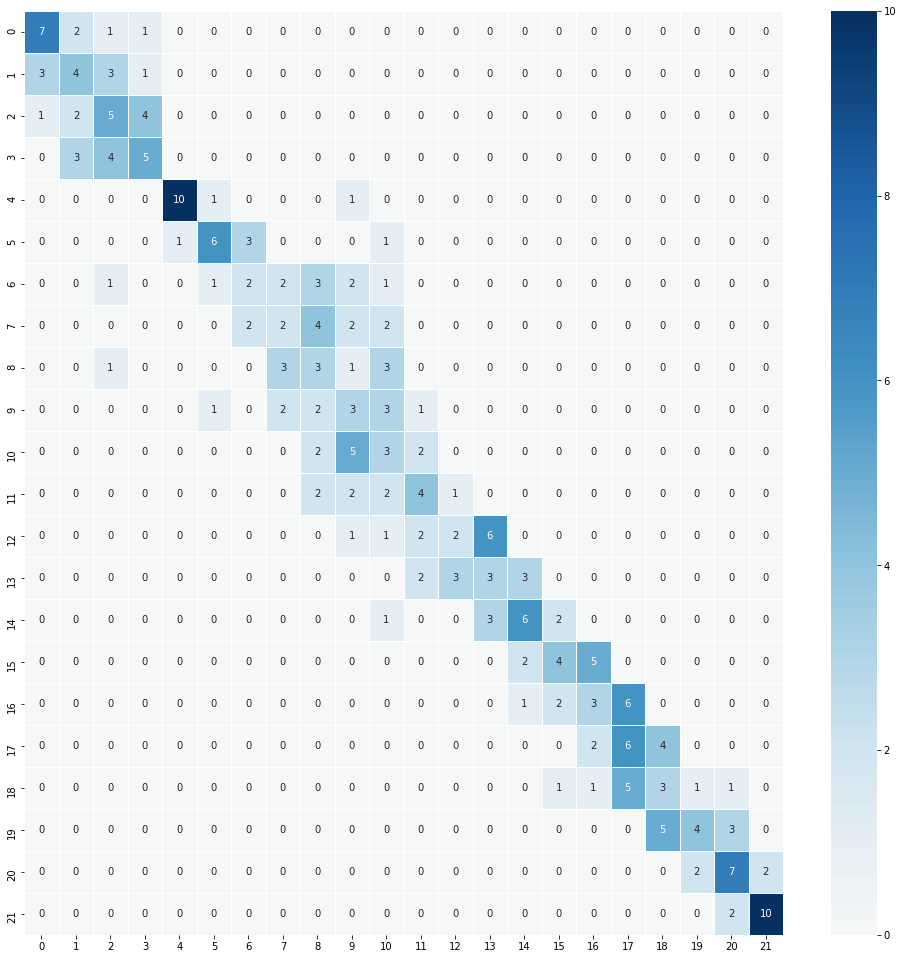

In [21]:
fig, ax = plt.subplots(figsize=(17,17))         
sns.heatmap(cm_df, annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1, center = 0)

In [22]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=248, random_state=41) 

In [23]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Fitting the model
rf_model_scaled = rf_model.fit(X_train_scaled, y_train)

In [24]:
#testing the model on the scaled test data
rf_model.score(X_test, y_test)

0.04296875

In [25]:
rf_model_scaled.score(X_test_scaled, y_test)

0.390625